# Análise exploratória de dados

In [1]:
#Importações básicas
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Descrição dos dados

#### Contexto: 

Esse conjunto de dados traz uma série de características que podem ser entendidas como sintomas de câncer pulmonar, o conjunto também valida ao final se cada instância realmente representa um indivíduo que tem a doença confirmada ou não.

In [4]:
#Obtendo os dados do arquivo
df = pd.read_csv("../data/raw/data.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### 1.1 Informações sobre os dados

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

**Verificamos então que o conjunto de dados possui 309 instâncias e 16 variáveis.**

### 1.2 Dados faltantes

In [25]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

**Felizmente, não há dados faltantes em nenhuma das colunas do conjunto de dados.**

### 1.3 Análise das variáveis

|VARIÁVEL|CLASSIFICAÇÃO|
|--|--|
|`GENDER`| Binário | 
|`AGE`| Ordinal |
|`SMOKING`| Binário | 
|`YELLOW_FINGERS`| Binário |
|`ANXIETY`| Binário |
|`PEER_PRESSURE`| Binário |
|`CHRONIC DISEASE`| Binário |
|`FATIGUE`| Binário |
|`ALLERGY`| Binário |
|`WEEZING`| Binário |
|`ALCOHOL CONSUMING`| Binário |
|`COUGHING`| Binário |
|`SHORTNESS OF BREATH`| Binário |
|`SWALLOWING DIFFICULTY`| Binário |
|`CHEST PAIN`| Binário |
|`LUNG_CANCER`| Binário |


### 1.4 Pré-processamento de dados

Como podemos notar, a maioria das variáveis do conjunto são classificadas como variáveis binárias,e muitas já passaram por uma binarização e se encontram atualmente no formato: 

`1 = False , 2 = True`

Porém, para que o conjunto fique mais **intuitivo**, podemos utilizar o seguinte formato :

`0 = False, 1 = True`

Além disso, as variáveis `GENDER` e `LUNG CANCER` ainda não estão codificadas, então também podemos utilizar esse mesmo formato e manter um padrão dentro do conjunto. 

In [74]:
df1 = df.copy()
to_replace = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']

#Substitui todas as colunas que estavam no formato (1 = False , 2 = True) para o novo formato (0 = False, 1 = True)
for i in to_replace:
    df1[i] = df1[i].map({1: 0, 2: 1})
    
#Substitui as colunas 'GENDER' e 'LUNG CANCER'
df1['GENDER'] = df1['GENDER'].map({'M': 0, 'F': 1})
df1['LUNG_CANCER'] = df1['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

df1.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


#### 1.5 Distribuição de variáveis

Primeiramente, vamos analisar se o conjunto está balanceado quanto ao gênero e a quantidade de casos confirmados de câncer de pulmão

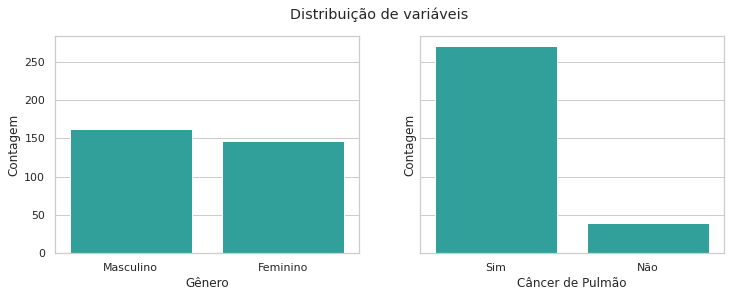

In [154]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.suptitle('Distribuição de variáveis')
sns.countplot(ax=axes[0], x=df1['GENDER'].map({0: 'Masculino', 1: 'Feminino'}), data=df1, color="lightseagreen")
sns.countplot(ax=axes[1], x=df1['LUNG_CANCER'].map({0: 'Não', 1: 'Sim'}), data=df1, color="lightseagreen")
axes[0].set(xlabel="Gênero", ylabel="Contagem")
axes[1].set(xlabel="Câncer de Pulmão", ylabel="Contagem")
plt.show()

**O conjunto de dados parece estar balanceado quanto ao gênero, por outro lado, a grande maioria das conclusões do teste são de casos confirmados de câncer de pulmão.**

Também podemos analisar a distribuição do conjunto por idade.

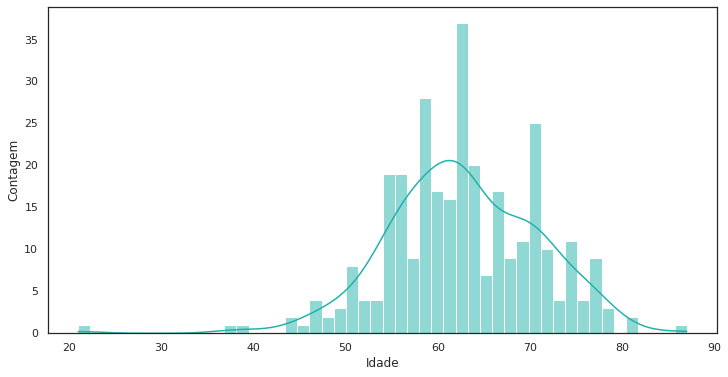

In [161]:
plt.figure(figsize=(12,6))
sns.set_theme(style="white") #Removendo o whitegrid para esse gráfico
ax = sns.histplot(data=df1, x='AGE', bins=50, kde=True, color="lightseagreen")
ax.set(xlabel='Idade', ylabel='Contagem')
plt.show()

**É perceptível que a grande maioria das entradas são de indivíduos que tem mais de 50 anos, o que pode significar que talvez exista uma relação direta entre a idade e a chance de contrair câncer pulmonar, uma vez que (como visto no gráfico anterior), o conjunto em sua maioria é composto por casos confirmados da doença.**

## 2. Perguntas de partida e hipóteses

## 3. Insights